In [55]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.svm import SVC
from autoviml.Auto_ViML import Auto_ViML

In [56]:
#DataFlair - Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
            result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [57]:
#DataFlair - Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#DataFlair - Emotions to observe
observed_emotions=["happy", "calm", "disgust", "fearful","sad","neutral","angry","surprised"]

In [58]:
#DataFlair - Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("data\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=False, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y,stratify=y, test_size=test_size, random_state=9)

In [10]:
x,y=[],[]
for file in glob.glob("data\\Actor_*\\*.wav"):
    file_name=os.path.basename(file)
    emotion=emotions[file_name.split("-")[2]]
    if emotion not in observed_emotions:
        continue
    feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
    x.append(feature)
    y.append(emotion)

In [37]:
df = pd.DataFrame.from_records(x, columns = ['N'+str(x) for x in range(1,181)])
df['emotion']=pd.DataFrame(y,columns=['emotion'])
size = int(0.7*df.shape[0])
train_df = df[:size]
test_df = df[size:]
df
#normalize the values later

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N25,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35,N36,N37,N38,N39,N40,N41,N42,N43,N44,N45,N46,N47,N48,N49,N50,...,N132,N133,N134,N135,N136,N137,N138,N139,N140,N141,N142,N143,N144,N145,N146,N147,N148,N149,N150,N151,N152,N153,N154,N155,N156,N157,N158,N159,N160,N161,N162,N163,N164,N165,N166,N167,N168,N169,N170,N171,N172,N173,N174,N175,N176,N177,N178,N179,N180,emotion
0,-693.50,50.06,0.57,14.33,3.34,-2.54,-4.06,-10.71,-7.29,1.74,-4.19,1.95,-5.25,2.78,-3.17,-3.40,-2.38,-0.57,-6.48,-1.24,-2.81,-5.44,-0.45,-3.64,-2.98,-0.56,-1.65,-0.56,-3.41,-2.24,-3.13,-2.70,-1.89,-0.55,-3.96,-2.13,-3.95,-1.62,-2.04,-3.63,0.63,0.65,0.62,0.63,0.66,0.66,0.70,0.73,0.75,0.72,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,neutral
1,-683.35,48.89,-1.68,19.18,1.97,-0.80,-4.80,-12.34,-5.45,2.11,-4.21,1.39,-5.13,2.01,-4.01,-2.79,-2.45,0.29,-5.54,-1.82,-2.50,-5.45,0.33,-4.98,-1.92,-0.34,-1.90,-0.06,-3.87,-1.82,-3.48,-2.38,-1.00,-1.87,-4.27,-2.40,-4.61,-1.18,-2.14,-2.96,0.66,0.71,0.71,0.68,0.70,0.73,0.72,0.76,0.79,0.79,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,neutral
2,-677.81,51.40,-0.01,14.30,0.77,-0.24,-6.17,-10.74,-7.62,1.28,-3.82,1.96,-5.74,0.40,-2.48,-5.35,-1.39,0.85,-5.60,-2.01,-2.20,-4.33,-0.26,-2.77,-2.85,-1.03,-1.74,-0.80,-3.13,-2.06,-2.60,-2.67,-2.00,-1.44,-4.34,-2.73,-3.03,-1.54,-2.32,-2.47,0.69,0.72,0.70,0.72,0.72,0.69,0.70,0.75,0.80,0.80,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,neutral
3,-674.02,50.68,1.88,14.30,3.07,1.58,-7.45,-11.41,-7.08,1.72,-2.58,0.67,-4.83,1.40,-1.66,-4.54,-0.71,-0.53,-5.09,-2.93,-1.28,-3.91,-1.17,-3.31,-2.35,-1.06,-1.03,-1.21,-3.36,-2.64,-3.73,-2.84,-1.46,-1.31,-3.59,-3.79,-3.51,-1.51,-2.20,-2.68,0.72,0.71,0.70,0.72,0.74,0.75,0.74,0.79,0.81,0.76,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,neutral
4,-709.06,55.73,2.67,16.36,3.34,-1.12,-5.82,-9.00,-9.01,1.84,-4.60,0.87,-5.27,2.29,-3.53,-4.01,-0.90,-2.07,-4.99,-2.40,-3.06,-5.34,-0.50,-4.57,-1.81,-0.79,-1.84,-0.43,-2.91,-1.27,-3.70,-0.66,-1.61,-1.54,-3.61,-3.62,-4.17,-2.33,-1.30,-1.50,0.60,0.63,0.70,0.69,0.68,0.69,0.70,0.72,0.73,0.75,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,calm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-572.82,17.48,-16.79,-5.53,-17.99,-11.48,-22.52,-8.28,-8.87,-8.23,-5.28,-4.58,3.74,3.58,-2.00,-0.06,-3.37,-0.50,1.26,-0.07,0.08,1.28,-2.47,-0.32,3.27,4.03,-0.69,-0.84,-0.31,2.20,-0.33,-1.49,-2.41,-1.17,-1.36,0.07,-1.54,-1.44,-1.06,-1.36,0.60,0.52,0.49,0.53,0.56,0.57,0.62,0.62,0.63,0.63,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (1007, 181)
    Training Set Memory Usage = 1.39 MB
Test Set Shape = (433, 181)
    Test Set Memory Usage = 0.60 MB
Single_Label Target: ['emotion']
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
ALERT! Setting Imbalanced_Flag to True in Auto_ViML for Multi_Classification problems improves results!
       Class  -> Counts -> Percent
       angry:     136  ->   13.5%
        calm:     136  ->   13.5%
     disgust:     131  ->   13.0%
     fearful:     136  ->   13.5%
       happy:     136  ->   13.5%
     neutral:      68  ->    6.8%
         sad:     136  ->   13.5%
   surprised:     128  ->   12.7%
CAUTION: In Multi-Class Boosting (2+ classes), TRAINING WILL TAKE A LOT OF TIME!
String or Multi Class target: emotion transformed as follows: {'fearful': 0, 'calm': 1, 'happy': 2, 'sad': 3, 'angry': 4, 

Could not plot SHAP values since SHAP is not installed or could not import SHAP in this machine
############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 61
Writing Output files to disk...
    Saving predictions to .\emotion\emotion_Multi_Classification_test_modified.csv
    Saving predictions to .\emotion\emotion_Multi_Classification_submission.csv
    Saving predictions to .\emotion\emotion_Multi_Classification_train_modified.csv
###############  C O M P L E T E D  ################
Time Taken in mins = 1.0 for the Entire Process


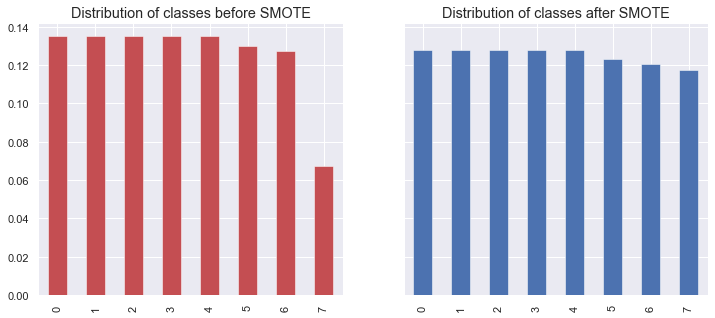

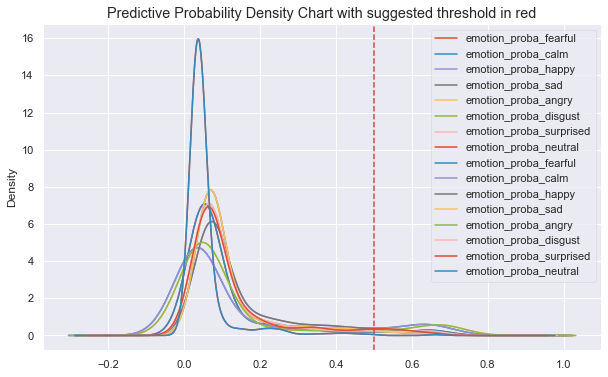

In [39]:
target='emotion'
model, features, trainm, testm = Auto_ViML(
    train_df,
    target,
    test_df,
    sample_submission="",
    hyper_param="RS",
    feature_reduction=True,
    scoring_parameter="accuracy",
    KMeans_Featurizer=False,
    Boosting_Flag=True,
    Binning_Flag=False,
    Add_Poly=False,
    Stacking_Flag=True,
    Imbalanced_Flag=True,
    verbose=3
)

In [59]:
#DataFlair - Split the dataset
# x_train,x_test,y_train,y_test=load_data(test_size=0.25)
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

UnboundLocalError: local variable 'result' referenced before assignment

In [51]:
#DataFlair - Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(1080, 360)


In [52]:
#DataFlair - Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [41]:
# DataFlair - Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [42]:
#DataFlair - Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [15]:
# model = SVC(kernel='rbf', random_state = 1)
# model.fit(x_train,y_train)

SVC(random_state=1)

In [43]:
#DataFlair - Predict for the test set
y_pred=model.predict(x_test)

In [44]:
#DataFlair - Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 43.06%


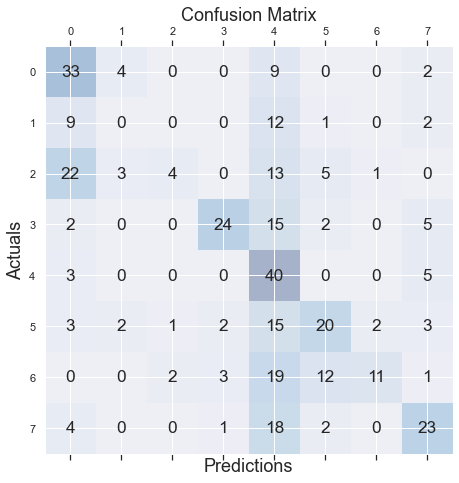

In [45]:
import matplotlib.pyplot as plt
conf_matrix=metrics.confusion_matrix(y_test, y_pred, labels=['calm', 'neutral', 'sad', 'angry', 'surprised', 'happy', 'fearful', 'disgust'])

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [20]:
print(metrics.classification_report(y_test, y_pred, labels=['calm', 'neutral', 'sad', 'angry', 'surprised', 'happy', 'fearful', 'disgust']))

              precision    recall  f1-score   support

        calm       0.30      0.69      0.42        48
     neutral       0.00      0.00      0.00        24
         sad       0.16      0.12      0.14        48
       angry       0.37      0.56      0.45        48
   surprised       0.29      0.23      0.26        48
       happy       0.20      0.29      0.24        48
     fearful       0.50      0.02      0.04        48
     disgust       0.32      0.21      0.25        48

    accuracy                           0.28       360
   macro avg       0.27      0.27      0.22       360
weighted avg       0.29      0.28      0.24       360

